# What is LSTM?

Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network (RNN) architecture. Unlike standard feedforward neural networks, LSTM has feedback connections that make it a "general-purpose computer" for processing sequences of data. This allows it to store information over long sequences and is exceptionally well-suited for various time-series prediction tasks.

Why LSTM for Stock Market Prediction?
Memory Cells: LSTMs are designed to remember past information and are ideal for sequence prediction problems. In the stock market, past stock prices are a good indicator of future stock behavior.

Handling Long Sequences: Traditional RNNs suffer from vanishing or exploding gradient problems. This makes them ineffective in learning from earlier time steps as the sequence gets longer. LSTMs are designed to combat these issues.

Feature Learning: LSTMs can learn to recognize important events (like economic indicators or market sentiments) and forget the non-important ones, making them very effective for financial time series where we have lots of irrelevant data points.

Robustness: LSTMs are less susceptible to noise in the data. Financial markets are highly volatile and noisy, but LSTMs can filter out the noise to make more accurate predictions.

Multivariate Time Series: LSTMs can handle scenarios where multiple variables influence the time series. For example, stock prices are influenced by opening price, lowest price of the day, highest price of the day, etc.

Real-Time Analysis: LSTMs can analyze and make predictions in real-time, a crucial requirement for stock trading where prices can change within seconds.

By using LSTM networks, you're leveraging these advantages to make more accurate and informed predictions about stock market movements. This can be a powerful tool in a financial analyst's arsenal, provided it's used responsibly and in conjunction with other methods for risk assessment.

# LSTM Stock Market Prediction for S&P 500
This notebook aims to predict the stock market moves for the S&P 500 using Long Short-Term Memory (LSTM) networks. The steps involved are as follows:
1. **Data Retrieval**: Fetch historical stock data for the S&P 500 from the Yahoo Finance API.
2. **Data Preprocessing**: Prepare the data for training, including normalization and reshaping.
3. **Model Building**: Create an LSTM model for time-series prediction.
4. **Training**: Train the model on the historical data.
5. **Prediction**: Use the model to predict stock prices for 2023.
6. **Evaluation**: Compare the predictions with actual historical data for 2023.
7. **Visualization**: Plot the predictions alongside the actual data.
Let's get started!

In [ ]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/524.1 MB ? eta -:--:--

     ╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/524.1 MB 212.7 MB/s eta 0:00:03

     ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/524.1 MB 273.5 MB/s eta 0:00:02

     ━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/524.1 MB 254.5 MB/s eta 0:00:02

     ━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/524.1 MB 255.0 MB/s eta 0:00:02

     ━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/524.1 MB 248.3 MB/s eta 0:00:02

     ━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/524.1 MB 214.2 MB/s eta 0:00:03

     ━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.3/524.1 MB 256.7 MB/s eta 0:00:02

     ━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/524.1 MB 246.5 MB/s eta 0:00:02

     ━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/524.1 MB 173.0 MB/s eta 0:00:03

     ━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/524.1 MB 155.3 MB/s eta 0:00:03

     ━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/524.1 MB 154.0 MB/s eta 0:00:03

     ━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/524.1 MB 206.9 MB/s eta 0:00:02

     ━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/524.1 MB 228.9 MB/s eta 0:00:02

     ━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.2/524.1 MB 158.5 MB/s eta 0:00:03

     ━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━ 162.3/524.1 MB 287.2 MB/s eta 0:00:02

     ━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━ 177.0/524.1 MB 208.6 MB/s eta 0:00:02

     ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━ 184.8/524.1 MB 193.9 MB/s eta 0:00:02

     ━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━ 203.1/524.1 MB 259.1 MB/s eta 0:00:02

     ━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 210.0/524.1 MB 214.1 MB/s eta 0:00:02

     ━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━ 226.5/524.1 MB 267.9 MB/s eta 0:00:02

     ━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━ 232.9/524.1 MB 208.2 MB/s eta 0:00:02

     ━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━ 242.2/524.1 MB 241.7 MB/s eta 0:00:02

     ━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━ 261.0/524.1 MB 260.3 MB/s eta 0:00:02

     ━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━ 270.1/524.1 MB 260.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━ 280.5/524.1 MB 151.0 MB/s eta 0:00:02

     ━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━ 288.4/524.1 MB 231.4 MB/s eta 0:00:02

     ━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━ 305.3/524.1 MB 230.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━ 312.5/524.1 MB 205.2 MB/s eta 0:00:02

     ━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━ 326.2/524.1 MB 184.7 MB/s eta 0:00:02

     ━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━ 333.5/524.1 MB 196.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━ 341.7/524.1 MB 235.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━ 355.2/524.1 MB 179.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━ 364.9/524.1 MB 278.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━ 380.6/524.1 MB 240.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━ 388.1/524.1 MB 210.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━ 398.4/524.1 MB 146.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━ 407.4/524.1 MB 259.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 424.5/524.1 MB 258.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━ 433.1/524.1 MB 281.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━ 439.3/524.1 MB 226.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━ 450.9/524.1 MB 163.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━ 458.0/524.1 MB 201.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━ 471.9/524.1 MB 232.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━ 478.7/524.1 MB 177.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━ 493.3/524.1 MB 243.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━ 501.0/524.1 MB 224.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺ 516.3/524.1 MB 212.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 520.4/524.1 MB 154.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 524.1/524.1 MB 151.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.2 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/57.5 kB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 51.2/57.5 kB 137.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 419.8 kB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/2.4 MB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 2.4/2.4 MB 204.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 2.4/2.4 MB 204.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 16.7 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/126.5 kB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━ 122.9/126.5 kB 182.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 1.3 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━ 61.4/65.5 kB 245.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━ 61.4/65.5 kB 245.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 597.7 kB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/440.8 kB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 440.3/440.8 kB 274.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 4.9 MB/s eta 0:00:00


     ━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/22.9 MB 206.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━ 14.2/22.9 MB 207.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 22.9/22.9 MB 273.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 22.9/22.9 MB 273.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 22.9/22.9 MB 273.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 22.9/22.9 MB 273.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 22.9/22.9 MB 273.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 22.9/22.9 MB 273.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 22.9/22.9 MB 273.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 23.9 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.7 MB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.7/1.7 MB 245.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.7/1.7 MB 245.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.7/1.7 MB 245.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.4 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/5.6 MB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 5.6/5.6 MB 252.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 5.6/5.6 MB 252.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 31.1 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━ 235.5/242.2 kB 257.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 kB 2.5 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━ 5.1/5.3 MB 153.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 104.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/6.6 MB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 6.6/6.6 MB 204.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 106.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 25.2 MB/s eta 0:00:00


  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.47.5


    Uninstalling grpcio-1.47.5:
      Successfully uninstalled grpcio-1.47.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flytekit 1.2.11 requires grpcio!=1.45.0,<1.49.1,<2.0,>=1.43.0, but you have grpcio 1.57.0 which is incompatible.
flytekit 1.2.11 requires protobuf<4,>=3.6.1, but you have protobuf 4.21.7 which is incompatible.
dagster 1.0.15 requires grpcio<1.48.1,>=1.32.0, but you have grpcio 1.57.0 which is incompatible.
dagster 1.0.15 requires protobuf<4,>=3.13.0, but you have protobuf 4.21.7 which is incompatible.


In [ ]:
!pip install -q yfinance

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
snowflake-connector-python 3.0.3 requires cryptography<41.0.0,>=3.1.0, but you have cryptography 41.0.3 which is incompatible.
flytekit 1.2.11 requires grpcio!=1.45.0,<1.49.1,<2.0,>=1.43.0, but you have grpcio 1.57.0 which is incompatible.
flytekit 1.2.11 requires protobuf<4,>=3.6.1, but you have protobuf 4.21.7 which is incompatible.
dagster 1.0.15 requires grpcio<1.48.1,>=1.32.0, but you have grpcio 1.57.0 which is incompatible.
dagster 1.0.15 requires protobuf<4,>=3.13.0, but you have protobuf 4.21.7 which is incompatible.


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

2023-09-02 19:32:05.064985: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-02 19:32:05.095268: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-02 19:32:05.095709: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2023-09-02 19:32:05.751068: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Step 1: Data Retrieval
Let's start by fetching the historical stock data for the S&P 500 from the Yahoo Finance API. We'll retrieve data from 2010 to 2023.

In [ ]:
# Fetch historical stock data for S&P 500 from 2010 to 2023
ticker = '^GSPC'
start_date = '2010-01-01'
end_date = '2023-09-02'
data = yf.download(ticker, start=start_date, end=end_date)
data.head()

[*********************100%%**********************]  1 of 1 completed

## Step 2: Data Preprocessing
Now that we have the historical data, let's preprocess it for our LSTM model. We'll focus on the 'Close' prices and perform the following steps:
1. Normalize the data
2. Create training and test datasets
3. Reshape the data for LSTM input

In [ ]:
# Extract 'Close' prices and convert to numpy array
close_data = data['Close'].values.reshape(-1, 1)
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)
# Create training and test datasets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]
# Reshape the data for LSTM input
X_train, y_train, X_test, y_test = [], [], [], []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((2692, 60, 1), (628, 60, 1))

## Step 3: Model Building
With our data preprocessed, we can now build the LSTM model. The architecture will consist of:
1. An LSTM layer with 50 units and a 'relu' activation function
2. A Dense layer with 25 units
3. A Dense layer with 1 unit (output layer)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, activation='relu', return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Summary of the model architecture
model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 lstm (LSTM)                 (None, 60, 50)            10400     


 lstm_1 (LSTM)               (None, 50)                20200     


 dense (Dense)               (None, 25)                1275      


 dense_1 (Dense)             (None, 1)                 26        


Total params: 31901 (124.61 KB)


Trainable params: 31901 (124.61 KB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


## Step 4: Training
Now that our model is built, let's train it on our training data. We'll use the following parameters:
1. `epochs=25`: Number of iterations over the entire dataset
2. `batch_size=64`: Number of samples per gradient update
3. `validation_data`: Data on which to evaluate the loss and any model metrics at the end of each epoch

In [ ]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=25,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)

36/43 [========================>.....] - ETA: 0s - loss: 3.7262e-04

37/43 [========================>.....] - ETA: 0s - loss: 3.6638e-04

38/43 [=========================>....] - ETA: 0s - loss: 3.6136e-04

39/43 [==========================>...] - ETA: 0s - loss: 3.5647e-04

40/43 [==========================>...] - ETA: 0s - loss: 3.5289e-04

41/43 [===========================>..] - ETA: 0s - loss: 3.4993e-04

42/43 [============================>.] - ETA: 0s - loss: 3.4748e-04

43/43 [==============================] - ETA: 0s - loss: 3.4713e-04

43/43 [==============================] - 4s 105ms/step - loss: 3.4713e-04 - val_loss: 0.0060


Epoch 3/25


 1/43 [..............................] - ETA: 4s - loss: 5.3119e-04

 2/43 [>.............................] - ETA: 3s - loss: 3.6740e-04

 3/43 [=>............................] - ETA: 3s - loss: 3.3555e-04

 4/43 [=>............................] - ETA: 3s - loss: 3.3530e-04

 5/43 [==>...........................] - ETA: 3s - loss: 2.9181e-04

 6/43 [===>..........................] - ETA: 3s - loss: 2.8253e-04

 7/43 [===>..........................] - ETA: 3s - loss: 3.0404e-04

 8/43 [====>.........................] - ETA: 3s - loss: 2.8496e-04

 9/43 [=====>........................] - ETA: 3s - loss: 2.7980e-04

10/43 [=====>........................] - ETA: 3s - loss: 3.2153e-04

11/43 [======>.......................] - ETA: 3s - loss: 3.3791e-04

12/43 [=======>......................] - ETA: 3s - loss: 3.2533e-04

13/43 [========>.....................] - ETA: 2s - loss: 3.0903e-04

14/43 [========>.....................] - ETA: 2s - loss: 2.9730e-04

15/43 [=========>....................] - ETA: 2s - loss: 3.1115e-04

16/43 [==========>...................] - ETA: 2s - loss: 3.0080e-04

17/43 [==========>...................] - ETA: 2s - loss: 2.9550e-04

18/43 [===========>..................] - ETA: 2s - loss: 2.8886e-04

19/43 [============>.................] - ETA: 2s - loss: 2.7997e-04

20/43 [============>.................] - ETA: 2s - loss: 2.8018e-04

21/43 [=============>................] - ETA: 2s - loss: 2.7414e-04

22/43 [==============>...............] - ETA: 2s - loss: 2.6910e-04

23/43 [===============>..............] - ETA: 2s - loss: 2.6438e-04

24/43 [===============>..............] - ETA: 1s - loss: 2.5906e-04

25/43 [================>.............] - ETA: 1s - loss: 2.5465e-04

26/43 [=================>............] - ETA: 1s - loss: 2.4902e-04

27/43 [=================>............] - ETA: 1s - loss: 2.7609e-04

28/43 [==================>...........] - ETA: 1s - loss: 2.7553e-04

29/43 [===================>..........] - ETA: 1s - loss: 2.6894e-04

30/43 [===================>..........] - ETA: 1s - loss: 2.6718e-04

31/43 [====================>.........] - ETA: 1s - loss: 2.6745e-04

32/43 [=====================>........] - ETA: 1s - loss: 2.6112e-04

33/43 [======================>.......] - ETA: 1s - loss: 2.5770e-04

34/43 [======================>.......] - ETA: 0s - loss: 2.5390e-04

35/43 [=======================>......] - ETA: 0s - loss: 2.6945e-04

36/43 [========================>.....] - ETA: 0s - loss: 2.6984e-04

37/43 [========================>.....] - ETA: 0s - loss: 2.6598e-04

38/43 [=========================>....] - ETA: 0s - loss: 2.6470e-04

39/43 [==========================>...] - ETA: 0s - loss: 2.6190e-04

40/43 [==========================>...] - ETA: 0s - loss: 2.5936e-04

41/43 [===========================>..] - ETA: 0s - loss: 2.5985e-04

42/43 [============================>.] - ETA: 0s - loss: 2.5790e-04

43/43 [==============================] - ETA: 0s - loss: 2.5785e-04

43/43 [==============================] - 5s 109ms/step - loss: 2.5785e-04 - val_loss: 0.0047


Epoch 4/25


 1/43 [..............................] - ETA: 4s - loss: 4.3232e-04

 2/43 [>.............................] - ETA: 4s - loss: 3.5096e-04

 3/43 [=>............................] - ETA: 3s - loss: 3.1887e-04

 4/43 [=>............................] - ETA: 3s - loss: 2.8223e-04

 5/43 [==>...........................] - ETA: 3s - loss: 2.4895e-04

 6/43 [===>..........................] - ETA: 3s - loss: 2.6789e-04

 7/43 [===>..........................] - ETA: 3s - loss: 2.6094e-04

 8/43 [====>.........................] - ETA: 3s - loss: 2.4152e-04

 9/43 [=====>........................] - ETA: 3s - loss: 2.7401e-04

10/43 [=====>........................] - ETA: 3s - loss: 2.5873e-04

11/43 [======>.......................] - ETA: 3s - loss: 2.5185e-04

12/43 [=======>......................] - ETA: 3s - loss: 2.4504e-04

13/43 [========>.....................] - ETA: 2s - loss: 2.5984e-04

14/43 [========>.....................] - ETA: 2s - loss: 2.5003e-04

15/43 [=========>....................] - ETA: 2s - loss: 2.5780e-04

16/43 [==========>...................] - ETA: 2s - loss: 2.5635e-04

17/43 [==========>...................] - ETA: 2s - loss: 2.4827e-04

18/43 [===========>..................] - ETA: 2s - loss: 2.4831e-04

19/43 [============>.................] - ETA: 2s - loss: 2.7278e-04

20/43 [============>.................] - ETA: 2s - loss: 2.6868e-04

21/43 [=============>................] - ETA: 2s - loss: 2.6559e-04

22/43 [==============>...............] - ETA: 2s - loss: 2.6066e-04

23/43 [===============>..............] - ETA: 1s - loss: 2.5370e-04

24/43 [===============>..............] - ETA: 1s - loss: 2.4742e-04

25/43 [================>.............] - ETA: 1s - loss: 2.5355e-04

26/43 [=================>............] - ETA: 1s - loss: 2.6707e-04

27/43 [=================>............] - ETA: 1s - loss: 2.6267e-04

28/43 [==================>...........] - ETA: 1s - loss: 2.6475e-04

29/43 [===================>..........] - ETA: 1s - loss: 2.6193e-04

30/43 [===================>..........] - ETA: 1s - loss: 2.5784e-04

31/43 [====================>.........] - ETA: 1s - loss: 2.6219e-04

32/43 [=====================>........] - ETA: 1s - loss: 2.6474e-04

33/43 [======================>.......] - ETA: 1s - loss: 2.6372e-04

34/43 [======================>.......] - ETA: 0s - loss: 2.6189e-04

35/43 [=======================>......] - ETA: 0s - loss: 2.5900e-04

36/43 [========================>.....] - ETA: 0s - loss: 2.5906e-04

37/43 [========================>.....] - ETA: 0s - loss: 2.5513e-04

39/43 [==========================>...] - ETA: 0s - loss: 2.5607e-04

40/43 [==========================>...] - ETA: 0s - loss: 2.5155e-04

41/43 [===========================>..] - ETA: 0s - loss: 2.4844e-04

42/43 [============================>.] - ETA: 0s - loss: 2.4847e-04

43/43 [==============================] - ETA: 0s - loss: 2.4824e-04

43/43 [==============================] - 5s 107ms/step - loss: 2.4824e-04 - val_loss: 0.0049


Epoch 5/25


 1/43 [..............................] - ETA: 3s - loss: 2.1935e-04

 2/43 [>.............................] - ETA: 4s - loss: 2.2299e-04

 3/43 [=>............................] - ETA: 3s - loss: 1.7502e-04

 4/43 [=>............................] - ETA: 3s - loss: 1.6167e-04

 5/43 [==>...........................] - ETA: 3s - loss: 2.0120e-04

 6/43 [===>..........................] - ETA: 3s - loss: 2.1420e-04

 7/43 [===>..........................] - ETA: 3s - loss: 2.0927e-04

 8/43 [====>.........................] - ETA: 3s - loss: 1.9525e-04

 9/43 [=====>........................] - ETA: 3s - loss: 1.8781e-04

10/43 [=====>........................] - ETA: 3s - loss: 1.9093e-04

11/43 [======>.......................] - ETA: 3s - loss: 2.1256e-04

12/43 [=======>......................] - ETA: 3s - loss: 2.0722e-04

13/43 [========>.....................] - ETA: 3s - loss: 2.2345e-04

14/43 [========>.....................] - ETA: 2s - loss: 2.2431e-04

15/43 [=========>....................] - ETA: 2s - loss: 2.3145e-04

16/43 [==========>...................] - ETA: 2s - loss: 2.3329e-04

17/43 [==========>...................] - ETA: 2s - loss: 2.2994e-04

18/43 [===========>..................] - ETA: 2s - loss: 2.2779e-04

19/43 [============>.................] - ETA: 2s - loss: 2.2058e-04

20/43 [============>.................] - ETA: 2s - loss: 2.1522e-04

21/43 [=============>................] - ETA: 2s - loss: 2.2288e-04

22/43 [==============>...............] - ETA: 2s - loss: 2.2393e-04

23/43 [===============>..............] - ETA: 2s - loss: 2.2057e-04

24/43 [===============>..............] - ETA: 2s - loss: 2.2775e-04

25/43 [================>.............] - ETA: 1s - loss: 2.2352e-04

26/43 [=================>............] - ETA: 1s - loss: 2.2570e-04

27/43 [=================>............] - ETA: 1s - loss: 2.2349e-04

28/43 [==================>...........] - ETA: 1s - loss: 2.2189e-04

29/43 [===================>..........] - ETA: 1s - loss: 2.2434e-04

30/43 [===================>..........] - ETA: 1s - loss: 2.1957e-04

31/43 [====================>.........] - ETA: 1s - loss: 2.1601e-04

32/43 [=====================>........] - ETA: 1s - loss: 2.2579e-04

33/43 [======================>.......] - ETA: 1s - loss: 2.3515e-04

34/43 [======================>.......] - ETA: 0s - loss: 2.3700e-04

35/43 [=======================>......] - ETA: 0s - loss: 2.3432e-04

36/43 [========================>.....] - ETA: 0s - loss: 2.4153e-04

37/43 [========================>.....] - ETA: 0s - loss: 2.3976e-04

38/43 [=========================>....] - ETA: 0s - loss: 2.4048e-04

39/43 [==========================>...] - ETA: 0s - loss: 2.3722e-04

40/43 [==========================>...] - ETA: 0s - loss: 2.3608e-04

41/43 [===========================>..] - ETA: 0s - loss: 2.3433e-04

42/43 [============================>.] - ETA: 0s - loss: 2.3655e-04

43/43 [==============================] - ETA: 0s - loss: 2.3628e-04

43/43 [==============================] - 5s 112ms/step - loss: 2.3628e-04 - val_loss: 0.0022


Epoch 6/25


 1/43 [..............................] - ETA: 3s - loss: 1.5867e-04

 2/43 [>.............................] - ETA: 3s - loss: 1.1652e-04

 3/43 [=>............................] - ETA: 3s - loss: 2.2412e-04

 4/43 [=>............................] - ETA: 3s - loss: 2.6499e-04

 5/43 [==>...........................] - ETA: 3s - loss: 2.3736e-04

 6/43 [===>..........................] - ETA: 3s - loss: 2.1927e-04

 7/43 [===>..........................] - ETA: 3s - loss: 2.1327e-04

 8/43 [====>.........................] - ETA: 3s - loss: 2.1428e-04

 9/43 [=====>........................] - ETA: 3s - loss: 2.1185e-04

10/43 [=====>........................] - ETA: 3s - loss: 2.0760e-04

11/43 [======>.......................] - ETA: 3s - loss: 2.0220e-04

12/43 [=======>......................] - ETA: 3s - loss: 2.0068e-04

13/43 [========>.....................] - ETA: 3s - loss: 2.1794e-04

14/43 [========>.....................] - ETA: 2s - loss: 2.1054e-04

15/43 [=========>....................] - ETA: 2s - loss: 2.0750e-04

16/43 [==========>...................] - ETA: 2s - loss: 2.3988e-04

17/43 [==========>...................] - ETA: 2s - loss: 2.4080e-04

18/43 [===========>..................] - ETA: 2s - loss: 2.3586e-04

19/43 [============>.................] - ETA: 2s - loss: 2.3166e-04

20/43 [============>.................] - ETA: 2s - loss: 2.4117e-04

21/43 [=============>................] - ETA: 2s - loss: 2.3447e-04

22/43 [==============>...............] - ETA: 2s - loss: 2.3008e-04

23/43 [===============>..............] - ETA: 2s - loss: 2.3010e-04

25/43 [================>.............] - ETA: 1s - loss: 2.4173e-04

26/43 [=================>............] - ETA: 1s - loss: 2.4632e-04

27/43 [=================>............] - ETA: 1s - loss: 2.4364e-04

28/43 [==================>...........] - ETA: 1s - loss: 2.4571e-04

29/43 [===================>..........] - ETA: 1s - loss: 2.4320e-04

30/43 [===================>..........] - ETA: 1s - loss: 2.4038e-04

31/43 [====================>.........] - ETA: 1s - loss: 2.3779e-04

32/43 [=====================>........] - ETA: 1s - loss: 2.4037e-04

33/43 [======================>.......] - ETA: 1s - loss: 2.3558e-04

34/43 [======================>.......] - ETA: 0s - loss: 2.4712e-04

36/43 [========================>.....] - ETA: 0s - loss: 2.4635e-04

37/43 [========================>.....] - ETA: 0s - loss: 2.4343e-04

38/43 [=========================>....] - ETA: 0s - loss: 2.4053e-04

39/43 [==========================>...] - ETA: 0s - loss: 2.4037e-04

40/43 [==========================>...] - ETA: 0s - loss: 2.4569e-04

41/43 [===========================>..] - ETA: 0s - loss: 2.4323e-04

42/43 [============================>.] - ETA: 0s - loss: 2.4168e-04

43/43 [==============================] - 5s 109ms/step - loss: 2.4341e-04 - val_loss: 0.0018


Epoch 7/25


 1/43 [..............................] - ETA: 1s - loss: 8.4561e-04

 2/43 [>.............................] - ETA: 3s - loss: 7.5633e-04

 3/43 [=>............................] - ETA: 3s - loss: 6.4566e-04

 4/43 [=>............................] - ETA: 3s - loss: 5.4935e-04

 5/43 [==>...........................] - ETA: 3s - loss: 5.0949e-04

 6/43 [===>..........................] - ETA: 3s - loss: 5.7669e-04

 7/43 [===>..........................] - ETA: 3s - loss: 5.4893e-04

 8/43 [====>.........................] - ETA: 3s - loss: 5.2239e-04

 9/43 [=====>........................] - ETA: 3s - loss: 5.1310e-04

10/43 [=====>........................] - ETA: 3s - loss: 4.8659e-04

11/43 [======>.......................] - ETA: 3s - loss: 4.7677e-04

12/43 [=======>......................] - ETA: 3s - loss: 4.6000e-04

13/43 [========>.....................] - ETA: 2s - loss: 4.3914e-04

14/43 [========>.....................] - ETA: 2s - loss: 4.5851e-04

15/43 [=========>....................] - ETA: 2s - loss: 4.4045e-04

16/43 [==========>...................] - ETA: 2s - loss: 4.2200e-04

17/43 [==========>...................] - ETA: 2s - loss: 4.0891e-04

18/43 [===========>..................] - ETA: 2s - loss: 4.0024e-04

19/43 [============>.................] - ETA: 2s - loss: 3.8686e-04

20/43 [============>.................] - ETA: 2s - loss: 3.9348e-04

21/43 [=============>................] - ETA: 2s - loss: 3.9517e-04

22/43 [==============>...............] - ETA: 2s - loss: 3.8949e-04

23/43 [===============>..............] - ETA: 2s - loss: 3.7882e-04

24/43 [===============>..............] - ETA: 1s - loss: 3.6931e-04

25/43 [================>.............] - ETA: 1s - loss: 3.6281e-04

26/43 [=================>............] - ETA: 1s - loss: 3.5497e-04

27/43 [=================>............] - ETA: 1s - loss: 3.5033e-04

28/43 [==================>...........] - ETA: 1s - loss: 3.5843e-04

29/43 [===================>..........] - ETA: 1s - loss: 3.5283e-04

30/43 [===================>..........] - ETA: 1s - loss: 3.4845e-04

31/43 [====================>.........] - ETA: 1s - loss: 3.4354e-04

32/43 [=====================>........] - ETA: 1s - loss: 3.3831e-04

33/43 [======================>.......] - ETA: 1s - loss: 3.3201e-04

34/43 [======================>.......] - ETA: 0s - loss: 3.3816e-04

35/43 [=======================>......] - ETA: 0s - loss: 3.3583e-04

36/43 [========================>.....] - ETA: 0s - loss: 3.3066e-04

37/43 [========================>.....] - ETA: 0s - loss: 3.2528e-04

38/43 [=========================>....] - ETA: 0s - loss: 3.2029e-04

39/43 [==========================>...] - ETA: 0s - loss: 3.1806e-04

40/43 [==========================>...] - ETA: 0s - loss: 3.1327e-04

41/43 [===========================>..] - ETA: 0s - loss: 3.0779e-04

42/43 [============================>.] - ETA: 0s - loss: 3.0331e-04

43/43 [==============================] - 5s 109ms/step - loss: 3.0290e-04 - val_loss: 0.0024


Epoch 8/25


 1/43 [..............................] - ETA: 3s - loss: 1.4056e-04

 3/43 [=>............................] - ETA: 2s - loss: 1.3236e-04

 4/43 [=>............................] - ETA: 2s - loss: 1.3155e-04

 5/43 [==>...........................] - ETA: 3s - loss: 1.3617e-04

 6/43 [===>..........................] - ETA: 3s - loss: 1.7546e-04

 7/43 [===>..........................] - ETA: 3s - loss: 1.6391e-04

 8/43 [====>.........................] - ETA: 3s - loss: 1.5462e-04

 9/43 [=====>........................] - ETA: 3s - loss: 1.6789e-04

10/43 [=====>........................] - ETA: 3s - loss: 1.5845e-04

11/43 [======>.......................] - ETA: 3s - loss: 1.5295e-04

13/43 [========>.....................] - ETA: 2s - loss: 1.6323e-04

14/43 [========>.....................] - ETA: 2s - loss: 2.0342e-04

15/43 [=========>....................] - ETA: 2s - loss: 2.0478e-04

16/43 [==========>...................] - ETA: 2s - loss: 2.0287e-04

17/43 [==========>...................] - ETA: 2s - loss: 1.9832e-04

18/43 [===========>..................] - ETA: 2s - loss: 2.0580e-04

19/43 [============>.................] - ETA: 2s - loss: 2.0179e-04

20/43 [============>.................] - ETA: 2s - loss: 2.1126e-04

21/43 [=============>................] - ETA: 2s - loss: 2.1018e-04

22/43 [==============>...............] - ETA: 2s - loss: 2.1016e-04

23/43 [===============>..............] - ETA: 2s - loss: 2.0971e-04

24/43 [===============>..............] - ETA: 1s - loss: 2.0657e-04

25/43 [================>.............] - ETA: 1s - loss: 2.0683e-04

26/43 [=================>............] - ETA: 1s - loss: 2.0947e-04

27/43 [=================>............] - ETA: 1s - loss: 2.0866e-04

28/43 [==================>...........] - ETA: 1s - loss: 2.2229e-04

29/43 [===================>..........] - ETA: 1s - loss: 2.1885e-04

30/43 [===================>..........] - ETA: 1s - loss: 2.1718e-04

31/43 [====================>.........] - ETA: 1s - loss: 2.1445e-04

32/43 [=====================>........] - ETA: 1s - loss: 2.1381e-04

33/43 [======================>.......] - ETA: 1s - loss: 2.1348e-04

34/43 [======================>.......] - ETA: 0s - loss: 2.1122e-04

35/43 [=======================>......] - ETA: 0s - loss: 2.1569e-04

36/43 [========================>.....] - ETA: 0s - loss: 2.1226e-04

37/43 [========================>.....] - ETA: 0s - loss: 2.1464e-04

38/43 [=========================>....] - ETA: 0s - loss: 2.1179e-04

39/43 [==========================>...] - ETA: 0s - loss: 2.1144e-04

40/43 [==========================>...] - ETA: 0s - loss: 2.0798e-04

41/43 [===========================>..] - ETA: 0s - loss: 2.0622e-04

42/43 [============================>.] - ETA: 0s - loss: 2.1567e-04

43/43 [==============================] - ETA: 0s - loss: 2.1537e-04

43/43 [==============================] - 5s 108ms/step - loss: 2.1537e-04 - val_loss: 0.0012


Epoch 9/25


 1/43 [..............................] - ETA: 3s - loss: 1.3625e-04

 2/43 [>.............................] - ETA: 4s - loss: 1.3263e-04

 3/43 [=>............................] - ETA: 4s - loss: 1.4500e-04

 4/43 [=>............................] - ETA: 3s - loss: 1.3669e-04

 5/43 [==>...........................] - ETA: 3s - loss: 1.4688e-04

 6/43 [===>..........................] - ETA: 4s - loss: 1.8538e-04

 7/43 [===>..........................] - ETA: 4s - loss: 2.0203e-04

 9/43 [=====>........................] - ETA: 3s - loss: 1.9312e-04

10/43 [=====>........................] - ETA: 3s - loss: 1.9645e-04

11/43 [======>.......................] - ETA: 3s - loss: 1.8486e-04

12/43 [=======>......................] - ETA: 3s - loss: 1.7747e-04

13/43 [========>.....................] - ETA: 3s - loss: 1.7037e-04

14/43 [========>.....................] - ETA: 3s - loss: 1.7772e-04

15/43 [=========>....................] - ETA: 2s - loss: 1.8468e-04

16/43 [==========>...................] - ETA: 2s - loss: 1.7812e-04

17/43 [==========>...................] - ETA: 2s - loss: 1.7393e-04

18/43 [===========>..................] - ETA: 2s - loss: 1.9790e-04

19/43 [============>.................] - ETA: 2s - loss: 1.9961e-04

20/43 [============>.................] - ETA: 2s - loss: 2.0461e-04

21/43 [=============>................] - ETA: 2s - loss: 2.0680e-04

22/43 [==============>...............] - ETA: 2s - loss: 2.0483e-04

23/43 [===============>..............] - ETA: 2s - loss: 2.1383e-04

24/43 [===============>..............] - ETA: 1s - loss: 2.1405e-04

25/43 [================>.............] - ETA: 1s - loss: 2.0844e-04

26/43 [=================>............] - ETA: 1s - loss: 2.0627e-04

27/43 [=================>............] - ETA: 1s - loss: 2.1204e-04

28/43 [==================>...........] - ETA: 1s - loss: 2.0886e-04

29/43 [===================>..........] - ETA: 1s - loss: 2.0735e-04

30/43 [===================>..........] - ETA: 1s - loss: 2.0995e-04

31/43 [====================>.........] - ETA: 1s - loss: 2.0636e-04

32/43 [=====================>........] - ETA: 1s - loss: 2.0554e-04

33/43 [======================>.......] - ETA: 1s - loss: 2.0432e-04

34/43 [======================>.......] - ETA: 0s - loss: 2.0173e-04

35/43 [=======================>......] - ETA: 0s - loss: 1.9941e-04

36/43 [========================>.....] - ETA: 0s - loss: 1.9938e-04

37/43 [========================>.....] - ETA: 0s - loss: 1.9874e-04

38/43 [=========================>....] - ETA: 0s - loss: 2.0023e-04

39/43 [==========================>...] - ETA: 0s - loss: 1.9709e-04

40/43 [==========================>...] - ETA: 0s - loss: 1.9450e-04

41/43 [===========================>..] - ETA: 0s - loss: 2.0205e-04

42/43 [============================>.] - ETA: 0s - loss: 2.0309e-04

43/43 [==============================] - ETA: 0s - loss: 2.0284e-04

43/43 [==============================] - 5s 112ms/step - loss: 2.0284e-04 - val_loss: 0.0015


Epoch 10/25


 1/43 [..............................] - ETA: 4s - loss: 1.2175e-04

 2/43 [>.............................] - ETA: 3s - loss: 1.2546e-04

 4/43 [=>............................] - ETA: 2s - loss: 1.3023e-04

 5/43 [==>...........................] - ETA: 3s - loss: 2.1736e-04

 6/43 [===>..........................] - ETA: 3s - loss: 2.1533e-04

 7/43 [===>..........................] - ETA: 3s - loss: 2.0541e-04

 8/43 [====>.........................] - ETA: 3s - loss: 1.9374e-04

 9/43 [=====>........................] - ETA: 3s - loss: 2.3404e-04

10/43 [=====>........................] - ETA: 2s - loss: 2.2281e-04

11/43 [======>.......................] - ETA: 2s - loss: 2.1291e-04

12/43 [=======>......................] - ETA: 2s - loss: 2.0033e-04

13/43 [========>.....................] - ETA: 2s - loss: 1.9340e-04

14/43 [========>.....................] - ETA: 2s - loss: 1.9185e-04

15/43 [=========>....................] - ETA: 2s - loss: 1.8663e-04

16/43 [==========>...................] - ETA: 2s - loss: 1.8686e-04

17/43 [==========>...................] - ETA: 2s - loss: 1.8000e-04

18/43 [===========>..................] - ETA: 2s - loss: 1.7710e-04

19/43 [============>.................] - ETA: 2s - loss: 1.7857e-04

20/43 [============>.................] - ETA: 2s - loss: 1.7551e-04

21/43 [=============>................] - ETA: 2s - loss: 1.7927e-04

22/43 [==============>...............] - ETA: 1s - loss: 1.8227e-04

23/43 [===============>..............] - ETA: 1s - loss: 1.7918e-04

24/43 [===============>..............] - ETA: 1s - loss: 1.7960e-04

25/43 [================>.............] - ETA: 1s - loss: 1.7754e-04

26/43 [=================>............] - ETA: 1s - loss: 1.7665e-04

27/43 [=================>............] - ETA: 1s - loss: 1.8351e-04

28/43 [==================>...........] - ETA: 1s - loss: 1.8489e-04

29/43 [===================>..........] - ETA: 1s - loss: 1.8284e-04

30/43 [===================>..........] - ETA: 1s - loss: 1.7947e-04

31/43 [====================>.........] - ETA: 1s - loss: 1.8833e-04

32/43 [=====================>........] - ETA: 1s - loss: 1.8875e-04

33/43 [======================>.......] - ETA: 0s - loss: 1.8844e-04

34/43 [======================>.......] - ETA: 0s - loss: 1.8809e-04

35/43 [=======================>......] - ETA: 0s - loss: 2.0130e-04

36/43 [========================>.....] - ETA: 0s - loss: 2.0077e-04

37/43 [========================>.....] - ETA: 0s - loss: 1.9754e-04

38/43 [=========================>....] - ETA: 0s - loss: 1.9432e-04

39/43 [==========================>...] - ETA: 0s - loss: 1.9419e-04

40/43 [==========================>...] - ETA: 0s - loss: 1.9157e-04

41/43 [===========================>..] - ETA: 0s - loss: 1.9208e-04

42/43 [============================>.] - ETA: 0s - loss: 1.9050e-04

43/43 [==============================] - 5s 105ms/step - loss: 1.9032e-04 - val_loss: 8.3737e-04


Epoch 11/25


 1/43 [..............................] - ETA: 4s - loss: 1.7582e-04

 2/43 [>.............................] - ETA: 3s - loss: 2.2041e-04

 3/43 [=>............................] - ETA: 4s - loss: 2.0907e-04

 4/43 [=>............................] - ETA: 3s - loss: 2.0798e-04

 5/43 [==>...........................] - ETA: 3s - loss: 2.1372e-04

 6/43 [===>..........................] - ETA: 3s - loss: 2.0905e-04

 7/43 [===>..........................] - ETA: 3s - loss: 1.9303e-04

 8/43 [====>.........................] - ETA: 3s - loss: 1.8602e-04

 9/43 [=====>........................] - ETA: 3s - loss: 1.8339e-04

10/43 [=====>........................] - ETA: 3s - loss: 1.8485e-04

11/43 [======>.......................] - ETA: 3s - loss: 1.7860e-04

12/43 [=======>......................] - ETA: 3s - loss: 1.7734e-04

13/43 [========>.....................] - ETA: 3s - loss: 1.7928e-04

14/43 [========>.....................] - ETA: 3s - loss: 1.8055e-04

15/43 [=========>....................] - ETA: 2s - loss: 1.7398e-04

16/43 [==========>...................] - ETA: 2s - loss: 1.7439e-04

17/43 [==========>...................] - ETA: 2s - loss: 1.8316e-04

18/43 [===========>..................] - ETA: 2s - loss: 1.8317e-04

19/43 [============>.................] - ETA: 2s - loss: 1.7839e-04

20/43 [============>.................] - ETA: 2s - loss: 1.7913e-04

21/43 [=============>................] - ETA: 2s - loss: 1.7691e-04

22/43 [==============>...............] - ETA: 2s - loss: 1.8142e-04

23/43 [===============>..............] - ETA: 2s - loss: 1.8564e-04

24/43 [===============>..............] - ETA: 1s - loss: 1.8163e-04

25/43 [================>.............] - ETA: 1s - loss: 1.7867e-04

26/43 [=================>............] - ETA: 1s - loss: 1.7557e-04

27/43 [=================>............] - ETA: 1s - loss: 1.8230e-04

28/43 [==================>...........] - ETA: 1s - loss: 1.8593e-04

29/43 [===================>..........] - ETA: 1s - loss: 1.8136e-04

30/43 [===================>..........] - ETA: 1s - loss: 1.7845e-04

31/43 [====================>.........] - ETA: 1s - loss: 1.7748e-04

32/43 [=====================>........] - ETA: 1s - loss: 1.7452e-04

33/43 [======================>.......] - ETA: 1s - loss: 1.7887e-04

34/43 [======================>.......] - ETA: 0s - loss: 1.7899e-04

35/43 [=======================>......] - ETA: 0s - loss: 1.8160e-04

36/43 [========================>.....] - ETA: 0s - loss: 1.9356e-04

37/43 [========================>.....] - ETA: 0s - loss: 1.9253e-04

38/43 [=========================>....] - ETA: 0s - loss: 1.9886e-04

39/43 [==========================>...] - ETA: 0s - loss: 1.9628e-04

40/43 [==========================>...] - ETA: 0s - loss: 1.9834e-04

41/43 [===========================>..] - ETA: 0s - loss: 1.9600e-04

42/43 [============================>.] - ETA: 0s - loss: 1.9513e-04

43/43 [==============================] - ETA: 0s - loss: 1.9496e-04

43/43 [==============================] - 5s 112ms/step - loss: 1.9496e-04 - val_loss: 7.2000e-04


Epoch 12/25


 1/43 [..............................] - ETA: 3s - loss: 2.6179e-04

 2/43 [>.............................] - ETA: 4s - loss: 2.4513e-04

 3/43 [=>............................] - ETA: 4s - loss: 2.0655e-04

 4/43 [=>............................] - ETA: 3s - loss: 1.8522e-04

 5/43 [==>...........................] - ETA: 3s - loss: 2.6351e-04

 6/43 [===>..........................] - ETA: 3s - loss: 3.1619e-04

 7/43 [===>..........................] - ETA: 3s - loss: 3.0204e-04

 8/43 [====>.........................] - ETA: 3s - loss: 3.2801e-04

 9/43 [=====>........................] - ETA: 3s - loss: 3.0986e-04

10/43 [=====>........................] - ETA: 3s - loss: 2.9683e-04

11/43 [======>.......................] - ETA: 3s - loss: 2.9218e-04

13/43 [========>.....................] - ETA: 2s - loss: 2.7704e-04

14/43 [========>.....................] - ETA: 2s - loss: 2.7503e-04

15/43 [=========>....................] - ETA: 2s - loss: 2.6991e-04

16/43 [==========>...................] - ETA: 2s - loss: 2.6467e-04

17/43 [==========>...................] - ETA: 2s - loss: 2.5948e-04

18/43 [===========>..................] - ETA: 2s - loss: 2.5245e-04

19/43 [============>.................] - ETA: 2s - loss: 2.4661e-04

20/43 [============>.................] - ETA: 2s - loss: 2.3785e-04

21/43 [=============>................] - ETA: 2s - loss: 2.3698e-04

22/43 [==============>...............] - ETA: 2s - loss: 2.3421e-04

23/43 [===============>..............] - ETA: 1s - loss: 2.2953e-04

24/43 [===============>..............] - ETA: 1s - loss: 2.2348e-04

25/43 [================>.............] - ETA: 1s - loss: 2.2027e-04

26/43 [=================>............] - ETA: 1s - loss: 2.2395e-04

27/43 [=================>............] - ETA: 1s - loss: 2.2052e-04

28/43 [==================>...........] - ETA: 1s - loss: 2.1713e-04

29/43 [===================>..........] - ETA: 1s - loss: 2.1617e-04

30/43 [===================>..........] - ETA: 1s - loss: 2.1549e-04

31/43 [====================>.........] - ETA: 1s - loss: 2.1440e-04

32/43 [=====================>........] - ETA: 1s - loss: 2.1118e-04

33/43 [======================>.......] - ETA: 1s - loss: 2.1199e-04

34/43 [======================>.......] - ETA: 0s - loss: 2.1066e-04

35/43 [=======================>......] - ETA: 0s - loss: 2.1016e-04

36/43 [========================>.....] - ETA: 0s - loss: 2.1586e-04

37/43 [========================>.....] - ETA: 0s - loss: 2.1690e-04

38/43 [=========================>....] - ETA: 0s - loss: 2.2191e-04

39/43 [==========================>...] - ETA: 0s - loss: 2.2384e-04

40/43 [==========================>...] - ETA: 0s - loss: 2.2344e-04

41/43 [===========================>..] - ETA: 0s - loss: 2.2455e-04

42/43 [============================>.] - ETA: 0s - loss: 2.2431e-04

43/43 [==============================] - ETA: 0s - loss: 2.2405e-04

43/43 [==============================] - 5s 108ms/step - loss: 2.2405e-04 - val_loss: 7.6384e-04


Epoch 13/25


 1/43 [..............................] - ETA: 3s - loss: 1.9636e-04

 2/43 [>.............................] - ETA: 3s - loss: 2.1855e-04

 3/43 [=>............................] - ETA: 3s - loss: 1.9258e-04

 4/43 [=>............................] - ETA: 3s - loss: 1.8195e-04

 5/43 [==>...........................] - ETA: 3s - loss: 1.7829e-04

 6/43 [===>..........................] - ETA: 3s - loss: 2.0503e-04

 7/43 [===>..........................] - ETA: 3s - loss: 1.9643e-04

 8/43 [====>.........................] - ETA: 3s - loss: 1.8594e-04

 9/43 [=====>........................] - ETA: 3s - loss: 1.9153e-04

10/43 [=====>........................] - ETA: 3s - loss: 1.7949e-04

11/43 [======>.......................] - ETA: 3s - loss: 1.9241e-04

12/43 [=======>......................] - ETA: 3s - loss: 1.8865e-04

13/43 [========>.....................] - ETA: 2s - loss: 1.8288e-04

14/43 [========>.....................] - ETA: 2s - loss: 1.7847e-04

15/43 [=========>....................] - ETA: 2s - loss: 1.7370e-04

16/43 [==========>...................] - ETA: 2s - loss: 1.7001e-04

17/43 [==========>...................] - ETA: 2s - loss: 1.7121e-04

18/43 [===========>..................] - ETA: 2s - loss: 1.7746e-04

19/43 [============>.................] - ETA: 2s - loss: 1.7245e-04

20/43 [============>.................] - ETA: 2s - loss: 1.7506e-04

21/43 [=============>................] - ETA: 2s - loss: 1.7370e-04

22/43 [==============>...............] - ETA: 2s - loss: 1.8346e-04

23/43 [===============>..............] - ETA: 2s - loss: 1.7989e-04

24/43 [===============>..............] - ETA: 1s - loss: 1.7546e-04

25/43 [================>.............] - ETA: 1s - loss: 1.8158e-04

26/43 [=================>............] - ETA: 1s - loss: 1.8059e-04

27/43 [=================>............] - ETA: 1s - loss: 1.7883e-04

28/43 [==================>...........] - ETA: 1s - loss: 1.8250e-04

29/43 [===================>..........] - ETA: 1s - loss: 1.7939e-04

30/43 [===================>..........] - ETA: 1s - loss: 1.7880e-04

31/43 [====================>.........] - ETA: 1s - loss: 1.8069e-04

32/43 [=====================>........] - ETA: 1s - loss: 1.8998e-04

33/43 [======================>.......] - ETA: 1s - loss: 1.9116e-04

34/43 [======================>.......] - ETA: 0s - loss: 1.9023e-04

35/43 [=======================>......] - ETA: 0s - loss: 1.9560e-04

36/43 [========================>.....] - ETA: 0s - loss: 1.9439e-04

38/43 [=========================>....] - ETA: 0s - loss: 1.9428e-04

39/43 [==========================>...] - ETA: 0s - loss: 1.9277e-04

40/43 [==========================>...] - ETA: 0s - loss: 1.9043e-04

41/43 [===========================>..] - ETA: 0s - loss: 1.8889e-04

42/43 [============================>.] - ETA: 0s - loss: 1.8640e-04

43/43 [==============================] - 5s 107ms/step - loss: 1.8624e-04 - val_loss: 6.7878e-04


Epoch 14/25


 1/43 [..............................] - ETA: 3s - loss: 1.0737e-04

 2/43 [>.............................] - ETA: 3s - loss: 1.8942e-04

 4/43 [=>............................] - ETA: 2s - loss: 1.6292e-04

 5/43 [==>...........................] - ETA: 2s - loss: 1.8891e-04

 6/43 [===>..........................] - ETA: 3s - loss: 2.0064e-04

 7/43 [===>..........................] - ETA: 3s - loss: 2.0352e-04

 8/43 [====>.........................] - ETA: 3s - loss: 1.9066e-04

 9/43 [=====>........................] - ETA: 3s - loss: 2.1060e-04

10/43 [=====>........................] - ETA: 3s - loss: 2.0092e-04

11/43 [======>.......................] - ETA: 3s - loss: 1.9391e-04

12/43 [=======>......................] - ETA: 3s - loss: 1.9026e-04

14/43 [========>.....................] - ETA: 2s - loss: 1.7680e-04

15/43 [=========>....................] - ETA: 2s - loss: 1.7259e-04

16/43 [==========>...................] - ETA: 2s - loss: 1.7116e-04

17/43 [==========>...................] - ETA: 2s - loss: 1.7195e-04

18/43 [===========>..................] - ETA: 2s - loss: 1.7503e-04

19/43 [============>.................] - ETA: 2s - loss: 1.7505e-04

20/43 [============>.................] - ETA: 2s - loss: 1.7905e-04

21/43 [=============>................] - ETA: 2s - loss: 1.7536e-04

22/43 [==============>...............] - ETA: 2s - loss: 1.7114e-04

23/43 [===============>..............] - ETA: 1s - loss: 1.6741e-04

24/43 [===============>..............] - ETA: 1s - loss: 1.7369e-04

25/43 [================>.............] - ETA: 1s - loss: 1.7459e-04

26/43 [=================>............] - ETA: 1s - loss: 1.7530e-04

27/43 [=================>............] - ETA: 1s - loss: 1.8449e-04

28/43 [==================>...........] - ETA: 1s - loss: 1.8170e-04

29/43 [===================>..........] - ETA: 1s - loss: 1.8446e-04

30/43 [===================>..........] - ETA: 1s - loss: 1.8610e-04

31/43 [====================>.........] - ETA: 1s - loss: 2.0065e-04

32/43 [=====================>........] - ETA: 1s - loss: 2.0009e-04

33/43 [======================>.......] - ETA: 0s - loss: 2.0228e-04

34/43 [======================>.......] - ETA: 0s - loss: 2.0071e-04

35/43 [=======================>......] - ETA: 0s - loss: 2.0054e-04

36/43 [========================>.....] - ETA: 0s - loss: 1.9726e-04

37/43 [========================>.....] - ETA: 0s - loss: 1.9923e-04

38/43 [=========================>....] - ETA: 0s - loss: 1.9725e-04

39/43 [==========================>...] - ETA: 0s - loss: 1.9404e-04

40/43 [==========================>...] - ETA: 0s - loss: 1.9291e-04

41/43 [===========================>..] - ETA: 0s - loss: 1.9150e-04

42/43 [============================>.] - ETA: 0s - loss: 1.9236e-04

43/43 [==============================] - ETA: 0s - loss: 1.9264e-04

43/43 [==============================] - 5s 105ms/step - loss: 1.9264e-04 - val_loss: 6.1923e-04


Epoch 15/25


 1/43 [..............................] - ETA: 3s - loss: 1.2287e-04

 2/43 [>.............................] - ETA: 4s - loss: 1.3669e-04

 3/43 [=>............................] - ETA: 4s - loss: 2.5098e-04

 4/43 [=>............................] - ETA: 4s - loss: 2.1500e-04

 5/43 [==>...........................] - ETA: 3s - loss: 1.9422e-04

 6/43 [===>..........................] - ETA: 3s - loss: 2.0595e-04

 7/43 [===>..........................] - ETA: 3s - loss: 1.8666e-04

 8/43 [====>.........................] - ETA: 3s - loss: 1.7694e-04

 9/43 [=====>........................] - ETA: 3s - loss: 1.8570e-04

10/43 [=====>........................] - ETA: 3s - loss: 1.8851e-04

11/43 [======>.......................] - ETA: 3s - loss: 1.8016e-04

12/43 [=======>......................] - ETA: 3s - loss: 1.7877e-04

13/43 [========>.....................] - ETA: 3s - loss: 1.8601e-04

14/43 [========>.....................] - ETA: 3s - loss: 1.8582e-04

15/43 [=========>....................] - ETA: 2s - loss: 1.7648e-04

16/43 [==========>...................] - ETA: 2s - loss: 1.7042e-04

17/43 [==========>...................] - ETA: 2s - loss: 1.6638e-04

18/43 [===========>..................] - ETA: 2s - loss: 1.6789e-04

19/43 [============>.................] - ETA: 2s - loss: 1.6645e-04

20/43 [============>.................] - ETA: 2s - loss: 1.7405e-04

21/43 [=============>................] - ETA: 2s - loss: 1.8885e-04

22/43 [==============>...............] - ETA: 2s - loss: 1.8902e-04

24/43 [===============>..............] - ETA: 1s - loss: 1.8508e-04

25/43 [================>.............] - ETA: 1s - loss: 1.8269e-04

26/43 [=================>............] - ETA: 1s - loss: 1.8099e-04

28/43 [==================>...........] - ETA: 1s - loss: 1.8075e-04

29/43 [===================>..........] - ETA: 1s - loss: 1.7882e-04

30/43 [===================>..........] - ETA: 1s - loss: 1.7810e-04

31/43 [====================>.........] - ETA: 1s - loss: 1.7743e-04

32/43 [=====================>........] - ETA: 1s - loss: 1.7745e-04

33/43 [======================>.......] - ETA: 1s - loss: 1.7564e-04

34/43 [======================>.......] - ETA: 0s - loss: 1.8162e-04

35/43 [=======================>......] - ETA: 0s - loss: 1.8306e-04

36/43 [========================>.....] - ETA: 0s - loss: 1.8147e-04

37/43 [========================>.....] - ETA: 0s - loss: 1.8140e-04

38/43 [=========================>....] - ETA: 0s - loss: 1.8253e-04

39/43 [==========================>...] - ETA: 0s - loss: 1.8002e-04

40/43 [==========================>...] - ETA: 0s - loss: 1.9268e-04

41/43 [===========================>..] - ETA: 0s - loss: 1.9070e-04

42/43 [============================>.] - ETA: 0s - loss: 1.9002e-04

43/43 [==============================] - ETA: 0s - loss: 1.9008e-04

43/43 [==============================] - 5s 110ms/step - loss: 1.9008e-04 - val_loss: 6.0251e-04


Epoch 16/25


 1/43 [..............................] - ETA: 3s - loss: 2.3823e-04

 2/43 [>.............................] - ETA: 3s - loss: 2.0417e-04

 4/43 [=>............................] - ETA: 2s - loss: 1.8079e-04

 5/43 [==>...........................] - ETA: 2s - loss: 1.9519e-04

 6/43 [===>..........................] - ETA: 3s - loss: 1.8065e-04

 7/43 [===>..........................] - ETA: 3s - loss: 1.8456e-04

 8/43 [====>.........................] - ETA: 3s - loss: 1.8233e-04

 9/43 [=====>........................] - ETA: 3s - loss: 1.7800e-04

10/43 [=====>........................] - ETA: 2s - loss: 1.9617e-04

11/43 [======>.......................] - ETA: 2s - loss: 1.8500e-04

12/43 [=======>......................] - ETA: 2s - loss: 2.0020e-04

13/43 [========>.....................] - ETA: 2s - loss: 2.0176e-04

14/43 [========>.....................] - ETA: 2s - loss: 1.9397e-04

15/43 [=========>....................] - ETA: 2s - loss: 1.9237e-04

16/43 [==========>...................] - ETA: 2s - loss: 1.8483e-04

17/43 [==========>...................] - ETA: 2s - loss: 1.8545e-04

18/43 [===========>..................] - ETA: 2s - loss: 1.9159e-04

19/43 [============>.................] - ETA: 2s - loss: 1.8991e-04

20/43 [============>.................] - ETA: 2s - loss: 1.8776e-04

21/43 [=============>................] - ETA: 2s - loss: 1.8651e-04

22/43 [==============>...............] - ETA: 2s - loss: 1.8766e-04

23/43 [===============>..............] - ETA: 1s - loss: 1.8274e-04

24/43 [===============>..............] - ETA: 1s - loss: 1.8186e-04

25/43 [================>.............] - ETA: 1s - loss: 1.7935e-04

26/43 [=================>............] - ETA: 1s - loss: 1.8134e-04

27/43 [=================>............] - ETA: 1s - loss: 1.7787e-04

29/43 [===================>..........] - ETA: 1s - loss: 1.7211e-04

30/43 [===================>..........] - ETA: 1s - loss: 1.7022e-04

32/43 [=====================>........] - ETA: 1s - loss: 1.6672e-04

33/43 [======================>.......] - ETA: 0s - loss: 1.6606e-04

34/43 [======================>.......] - ETA: 0s - loss: 1.6438e-04

36/43 [========================>.....] - ETA: 0s - loss: 1.6405e-04

37/43 [========================>.....] - ETA: 0s - loss: 1.6523e-04

38/43 [=========================>....] - ETA: 0s - loss: 1.6712e-04

39/43 [==========================>...] - ETA: 0s - loss: 1.6625e-04

40/43 [==========================>...] - ETA: 0s - loss: 1.6585e-04

41/43 [===========================>..] - ETA: 0s - loss: 1.6571e-04

42/43 [============================>.] - ETA: 0s - loss: 1.6388e-04

43/43 [==============================] - 4s 105ms/step - loss: 1.6393e-04 - val_loss: 6.1170e-04


Epoch 17/25


 1/43 [..............................] - ETA: 3s - loss: 3.7133e-04

 2/43 [>.............................] - ETA: 4s - loss: 3.3756e-04

 3/43 [=>............................] - ETA: 3s - loss: 2.8889e-04

 5/43 [==>...........................] - ETA: 3s - loss: 2.2256e-04

 6/43 [===>..........................] - ETA: 3s - loss: 2.2092e-04

 7/43 [===>..........................] - ETA: 3s - loss: 2.0212e-04

 8/43 [====>.........................] - ETA: 3s - loss: 1.9109e-04

 9/43 [=====>........................] - ETA: 3s - loss: 1.9984e-04

10/43 [=====>........................] - ETA: 3s - loss: 2.0949e-04

11/43 [======>.......................] - ETA: 3s - loss: 2.0132e-04

12/43 [=======>......................] - ETA: 3s - loss: 1.9461e-04

13/43 [========>.....................] - ETA: 2s - loss: 1.9950e-04

15/43 [=========>....................] - ETA: 2s - loss: 1.9460e-04

16/43 [==========>...................] - ETA: 2s - loss: 1.9203e-04

17/43 [==========>...................] - ETA: 2s - loss: 1.9366e-04

18/43 [===========>..................] - ETA: 2s - loss: 1.8899e-04

19/43 [============>.................] - ETA: 2s - loss: 1.8576e-04

20/43 [============>.................] - ETA: 2s - loss: 1.8300e-04

21/43 [=============>................] - ETA: 2s - loss: 1.7894e-04

22/43 [==============>...............] - ETA: 2s - loss: 1.8125e-04

23/43 [===============>..............] - ETA: 2s - loss: 1.7772e-04

24/43 [===============>..............] - ETA: 1s - loss: 1.7406e-04

25/43 [================>.............] - ETA: 1s - loss: 1.7184e-04

26/43 [=================>............] - ETA: 1s - loss: 1.6939e-04

27/43 [=================>............] - ETA: 1s - loss: 1.7275e-04

28/43 [==================>...........] - ETA: 1s - loss: 1.7345e-04

29/43 [===================>..........] - ETA: 1s - loss: 1.7135e-04

30/43 [===================>..........] - ETA: 1s - loss: 1.7156e-04

31/43 [====================>.........] - ETA: 1s - loss: 1.7193e-04

33/43 [======================>.......] - ETA: 0s - loss: 1.6847e-04

34/43 [======================>.......] - ETA: 0s - loss: 1.7069e-04

35/43 [=======================>......] - ETA: 0s - loss: 1.6923e-04

36/43 [========================>.....] - ETA: 0s - loss: 1.6839e-04

37/43 [========================>.....] - ETA: 0s - loss: 1.7457e-04

38/43 [=========================>....] - ETA: 0s - loss: 1.7602e-04

39/43 [==========================>...] - ETA: 0s - loss: 1.7486e-04

40/43 [==========================>...] - ETA: 0s - loss: 1.7283e-04

41/43 [===========================>..] - ETA: 0s - loss: 1.7086e-04

42/43 [============================>.] - ETA: 0s - loss: 1.7234e-04

43/43 [==============================] - 5s 107ms/step - loss: 1.7238e-04 - val_loss: 6.2368e-04


Epoch 18/25


 1/43 [..............................] - ETA: 4s - loss: 1.0420e-04

 2/43 [>.............................] - ETA: 4s - loss: 8.6199e-05

 3/43 [=>............................] - ETA: 3s - loss: 1.4444e-04

 4/43 [=>............................] - ETA: 3s - loss: 1.5659e-04

 5/43 [==>...........................] - ETA: 3s - loss: 1.6483e-04

 6/43 [===>..........................] - ETA: 3s - loss: 1.6690e-04

 7/43 [===>..........................] - ETA: 3s - loss: 1.9515e-04

 8/43 [====>.........................] - ETA: 3s - loss: 1.9127e-04

 9/43 [=====>........................] - ETA: 3s - loss: 1.7872e-04

10/43 [=====>........................] - ETA: 3s - loss: 1.7300e-04

11/43 [======>.......................] - ETA: 3s - loss: 1.6496e-04

12/43 [=======>......................] - ETA: 3s - loss: 1.6032e-04

13/43 [========>.....................] - ETA: 3s - loss: 1.5692e-04

14/43 [========>.....................] - ETA: 2s - loss: 1.5107e-04

15/43 [=========>....................] - ETA: 2s - loss: 1.4995e-04

17/43 [==========>...................] - ETA: 2s - loss: 1.5016e-04

18/43 [===========>..................] - ETA: 2s - loss: 1.5143e-04

19/43 [============>.................] - ETA: 2s - loss: 1.5037e-04

20/43 [============>.................] - ETA: 2s - loss: 1.4621e-04

21/43 [=============>................] - ETA: 2s - loss: 1.4448e-04

23/43 [===============>..............] - ETA: 2s - loss: 1.5417e-04

24/43 [===============>..............] - ETA: 1s - loss: 1.5100e-04

25/43 [================>.............] - ETA: 1s - loss: 1.5612e-04

26/43 [=================>............] - ETA: 1s - loss: 1.5302e-04

27/43 [=================>............] - ETA: 1s - loss: 1.5189e-04

28/43 [==================>...........] - ETA: 1s - loss: 1.5153e-04

29/43 [===================>..........] - ETA: 1s - loss: 1.5069e-04

30/43 [===================>..........] - ETA: 1s - loss: 1.4872e-04

31/43 [====================>.........] - ETA: 1s - loss: 1.4839e-04

32/43 [=====================>........] - ETA: 1s - loss: 1.4907e-04

33/43 [======================>.......] - ETA: 1s - loss: 1.4810e-04

34/43 [======================>.......] - ETA: 0s - loss: 1.4855e-04

35/43 [=======================>......] - ETA: 0s - loss: 1.4624e-04

36/43 [========================>.....] - ETA: 0s - loss: 1.4751e-04

37/43 [========================>.....] - ETA: 0s - loss: 1.4791e-04

38/43 [=========================>....] - ETA: 0s - loss: 1.5067e-04

39/43 [==========================>...] - ETA: 0s - loss: 1.5440e-04

40/43 [==========================>...] - ETA: 0s - loss: 1.6023e-04

41/43 [===========================>..] - ETA: 0s - loss: 1.6049e-04

42/43 [============================>.] - ETA: 0s - loss: 1.6102e-04

43/43 [==============================] - 5s 112ms/step - loss: 1.6087e-04 - val_loss: 0.0013


Epoch 19/25


 1/43 [..............................] - ETA: 3s - loss: 1.4086e-04

 3/43 [=>............................] - ETA: 2s - loss: 2.9355e-04

 4/43 [=>............................] - ETA: 2s - loss: 2.7803e-04

 5/43 [==>...........................] - ETA: 3s - loss: 2.6310e-04

 6/43 [===>..........................] - ETA: 3s - loss: 2.5869e-04

 7/43 [===>..........................] - ETA: 3s - loss: 2.4880e-04

 9/43 [=====>........................] - ETA: 3s - loss: 2.5486e-04

10/43 [=====>........................] - ETA: 3s - loss: 2.5069e-04

11/43 [======>.......................] - ETA: 3s - loss: 2.5328e-04

12/43 [=======>......................] - ETA: 3s - loss: 2.4752e-04

13/43 [========>.....................] - ETA: 3s - loss: 2.4507e-04

14/43 [========>.....................] - ETA: 2s - loss: 2.4205e-04

15/43 [=========>....................] - ETA: 2s - loss: 2.3712e-04

16/43 [==========>...................] - ETA: 2s - loss: 2.2814e-04

17/43 [==========>...................] - ETA: 2s - loss: 2.1764e-04

18/43 [===========>..................] - ETA: 2s - loss: 2.1107e-04

19/43 [============>.................] - ETA: 2s - loss: 2.0441e-04

20/43 [============>.................] - ETA: 2s - loss: 1.9721e-04

21/43 [=============>................] - ETA: 2s - loss: 1.9296e-04

22/43 [==============>...............] - ETA: 2s - loss: 1.8918e-04

23/43 [===============>..............] - ETA: 2s - loss: 1.9473e-04

24/43 [===============>..............] - ETA: 1s - loss: 1.9084e-04

25/43 [================>.............] - ETA: 1s - loss: 1.9322e-04

26/43 [=================>............] - ETA: 1s - loss: 1.9102e-04

27/43 [=================>............] - ETA: 1s - loss: 1.9106e-04

28/43 [==================>...........] - ETA: 1s - loss: 1.9273e-04

29/43 [===================>..........] - ETA: 1s - loss: 1.9020e-04

30/43 [===================>..........] - ETA: 1s - loss: 1.8727e-04

31/43 [====================>.........] - ETA: 1s - loss: 1.8424e-04

32/43 [=====================>........] - ETA: 1s - loss: 1.8282e-04

33/43 [======================>.......] - ETA: 1s - loss: 1.7963e-04

34/43 [======================>.......] - ETA: 0s - loss: 1.7742e-04

35/43 [=======================>......] - ETA: 0s - loss: 1.7442e-04

36/43 [========================>.....] - ETA: 0s - loss: 1.7260e-04

37/43 [========================>.....] - ETA: 0s - loss: 1.7460e-04

38/43 [=========================>....] - ETA: 0s - loss: 1.7192e-04

39/43 [==========================>...] - ETA: 0s - loss: 1.7107e-04

40/43 [==========================>...] - ETA: 0s - loss: 1.7423e-04

41/43 [===========================>..] - ETA: 0s - loss: 1.7244e-04

42/43 [============================>.] - ETA: 0s - loss: 1.7581e-04

43/43 [==============================] - 5s 112ms/step - loss: 1.7558e-04 - val_loss: 5.6832e-04


Epoch 20/25


 1/43 [..............................] - ETA: 1s - loss: 1.8465e-04

 2/43 [>.............................] - ETA: 6s - loss: 1.8761e-04

 3/43 [=>............................] - ETA: 5s - loss: 1.7110e-04

 4/43 [=>............................] - ETA: 4s - loss: 1.5070e-04

 5/43 [==>...........................] - ETA: 4s - loss: 1.4328e-04

 6/43 [===>..........................] - ETA: 4s - loss: 1.4261e-04

 8/43 [====>.........................] - ETA: 3s - loss: 1.5221e-04

 9/43 [=====>........................] - ETA: 3s - loss: 1.4476e-04

10/43 [=====>........................] - ETA: 3s - loss: 1.6617e-04

11/43 [======>.......................] - ETA: 3s - loss: 1.6414e-04

12/43 [=======>......................] - ETA: 3s - loss: 1.6145e-04

13/43 [========>.....................] - ETA: 3s - loss: 1.6079e-04

15/43 [=========>....................] - ETA: 2s - loss: 1.5755e-04

16/43 [==========>...................] - ETA: 2s - loss: 1.5697e-04

17/43 [==========>...................] - ETA: 2s - loss: 1.6024e-04

18/43 [===========>..................] - ETA: 2s - loss: 1.6547e-04

19/43 [============>.................] - ETA: 2s - loss: 1.6520e-04

20/43 [============>.................] - ETA: 2s - loss: 1.6649e-04

21/43 [=============>................] - ETA: 2s - loss: 1.7360e-04

22/43 [==============>...............] - ETA: 2s - loss: 1.7823e-04

23/43 [===============>..............] - ETA: 1s - loss: 1.7414e-04

24/43 [===============>..............] - ETA: 1s - loss: 1.7518e-04

25/43 [================>.............] - ETA: 1s - loss: 1.7384e-04

26/43 [=================>............] - ETA: 1s - loss: 1.7007e-04

27/43 [=================>............] - ETA: 1s - loss: 1.6984e-04

28/43 [==================>...........] - ETA: 1s - loss: 1.6970e-04

29/43 [===================>..........] - ETA: 1s - loss: 1.6855e-04

30/43 [===================>..........] - ETA: 1s - loss: 1.6698e-04

31/43 [====================>.........] - ETA: 1s - loss: 1.6379e-04

32/43 [=====================>........] - ETA: 1s - loss: 1.6119e-04

33/43 [======================>.......] - ETA: 1s - loss: 1.6036e-04

34/43 [======================>.......] - ETA: 0s - loss: 1.5782e-04

35/43 [=======================>......] - ETA: 0s - loss: 1.5632e-04

36/43 [========================>.....] - ETA: 0s - loss: 1.5555e-04

37/43 [========================>.....] - ETA: 0s - loss: 1.5416e-04

38/43 [=========================>....] - ETA: 0s - loss: 1.5455e-04

39/43 [==========================>...] - ETA: 0s - loss: 1.5447e-04

40/43 [==========================>...] - ETA: 0s - loss: 1.5338e-04

41/43 [===========================>..] - ETA: 0s - loss: 1.5179e-04

42/43 [============================>.] - ETA: 0s - loss: 1.5392e-04

43/43 [==============================] - ETA: 0s - loss: 1.5372e-04

43/43 [==============================] - 5s 109ms/step - loss: 1.5372e-04 - val_loss: 4.9676e-04


Epoch 21/25


 1/43 [..............................] - ETA: 1s - loss: 7.8992e-05

 2/43 [>.............................] - ETA: 3s - loss: 1.0861e-04

 3/43 [=>............................] - ETA: 5s - loss: 1.3582e-04

 4/43 [=>............................] - ETA: 4s - loss: 1.7507e-04

 5/43 [==>...........................] - ETA: 4s - loss: 1.6053e-04

 6/43 [===>..........................] - ETA: 4s - loss: 1.5537e-04

 7/43 [===>..........................] - ETA: 4s - loss: 1.6089e-04

 8/43 [====>.........................] - ETA: 3s - loss: 1.5192e-04

 9/43 [=====>........................] - ETA: 3s - loss: 1.5374e-04

10/43 [=====>........................] - ETA: 3s - loss: 1.4600e-04

11/43 [======>.......................] - ETA: 3s - loss: 1.5191e-04

12/43 [=======>......................] - ETA: 3s - loss: 1.5332e-04

13/43 [========>.....................] - ETA: 3s - loss: 1.5807e-04

14/43 [========>.....................] - ETA: 3s - loss: 1.5720e-04

15/43 [=========>....................] - ETA: 2s - loss: 1.6113e-04

16/43 [==========>...................] - ETA: 2s - loss: 1.6034e-04

17/43 [==========>...................] - ETA: 2s - loss: 1.5736e-04

18/43 [===========>..................] - ETA: 2s - loss: 1.5713e-04

19/43 [============>.................] - ETA: 2s - loss: 1.5572e-04

20/43 [============>.................] - ETA: 2s - loss: 1.6720e-04

21/43 [=============>................] - ETA: 2s - loss: 1.6743e-04

22/43 [==============>...............] - ETA: 2s - loss: 1.7195e-04

23/43 [===============>..............] - ETA: 2s - loss: 1.6713e-04

24/43 [===============>..............] - ETA: 2s - loss: 1.7068e-04

25/43 [================>.............] - ETA: 1s - loss: 1.6721e-04

26/43 [=================>............] - ETA: 1s - loss: 1.6260e-04

27/43 [=================>............] - ETA: 1s - loss: 1.6004e-04

28/43 [==================>...........] - ETA: 1s - loss: 1.5896e-04

29/43 [===================>..........] - ETA: 1s - loss: 1.5620e-04

30/43 [===================>..........] - ETA: 1s - loss: 1.5556e-04

31/43 [====================>.........] - ETA: 1s - loss: 1.5502e-04

32/43 [=====================>........] - ETA: 1s - loss: 1.5339e-04

33/43 [======================>.......] - ETA: 1s - loss: 1.5038e-04

34/43 [======================>.......] - ETA: 0s - loss: 1.4759e-04

35/43 [=======================>......] - ETA: 0s - loss: 1.4951e-04

36/43 [========================>.....] - ETA: 0s - loss: 1.4852e-04

37/43 [========================>.....] - ETA: 0s - loss: 1.5215e-04

38/43 [=========================>....] - ETA: 0s - loss: 1.4957e-04

40/43 [==========================>...] - ETA: 0s - loss: 1.4630e-04

41/43 [===========================>..] - ETA: 0s - loss: 1.4874e-04

42/43 [============================>.] - ETA: 0s - loss: 1.4726e-04

43/43 [==============================] - ETA: 0s - loss: 1.4707e-04

43/43 [==============================] - 5s 114ms/step - loss: 1.4707e-04 - val_loss: 5.4912e-04


Epoch 22/25


 1/43 [..............................] - ETA: 1s - loss: 5.9618e-05

 2/43 [>.............................] - ETA: 3s - loss: 1.2534e-04

 3/43 [=>............................] - ETA: 3s - loss: 1.4130e-04

 4/43 [=>............................] - ETA: 4s - loss: 1.3934e-04

 6/43 [===>..........................] - ETA: 3s - loss: 1.3374e-04

 7/43 [===>..........................] - ETA: 3s - loss: 1.3680e-04

 8/43 [====>.........................] - ETA: 3s - loss: 1.3411e-04

 9/43 [=====>........................] - ETA: 3s - loss: 1.4438e-04

10/43 [=====>........................] - ETA: 3s - loss: 1.4659e-04

11/43 [======>.......................] - ETA: 3s - loss: 1.4332e-04

12/43 [=======>......................] - ETA: 3s - loss: 1.3986e-04

13/43 [========>.....................] - ETA: 3s - loss: 1.6769e-04

14/43 [========>.....................] - ETA: 3s - loss: 1.7137e-04

15/43 [=========>....................] - ETA: 2s - loss: 1.6926e-04

16/43 [==========>...................] - ETA: 2s - loss: 1.6682e-04

17/43 [==========>...................] - ETA: 2s - loss: 1.6385e-04

18/43 [===========>..................] - ETA: 2s - loss: 1.5788e-04

19/43 [============>.................] - ETA: 2s - loss: 1.5564e-04

20/43 [============>.................] - ETA: 2s - loss: 1.5522e-04

21/43 [=============>................] - ETA: 2s - loss: 1.5370e-04

22/43 [==============>...............] - ETA: 2s - loss: 1.5224e-04

23/43 [===============>..............] - ETA: 2s - loss: 1.4922e-04

24/43 [===============>..............] - ETA: 1s - loss: 1.4948e-04

25/43 [================>.............] - ETA: 1s - loss: 1.5254e-04

26/43 [=================>............] - ETA: 1s - loss: 1.5054e-04

27/43 [=================>............] - ETA: 1s - loss: 1.4807e-04

28/43 [==================>...........] - ETA: 1s - loss: 1.4742e-04

29/43 [===================>..........] - ETA: 1s - loss: 1.4501e-04

30/43 [===================>..........] - ETA: 1s - loss: 1.4247e-04

31/43 [====================>.........] - ETA: 1s - loss: 1.4058e-04

32/43 [=====================>........] - ETA: 1s - loss: 1.3840e-04

33/43 [======================>.......] - ETA: 1s - loss: 1.3652e-04

34/43 [======================>.......] - ETA: 0s - loss: 1.3534e-04

35/43 [=======================>......] - ETA: 0s - loss: 1.3569e-04

36/43 [========================>.....] - ETA: 0s - loss: 1.3944e-04

37/43 [========================>.....] - ETA: 0s - loss: 1.3709e-04

38/43 [=========================>....] - ETA: 0s - loss: 1.3559e-04

39/43 [==========================>...] - ETA: 0s - loss: 1.3713e-04

41/43 [===========================>..] - ETA: 0s - loss: 1.3415e-04

42/43 [============================>.] - ETA: 0s - loss: 1.3354e-04

43/43 [==============================] - ETA: 0s - loss: 1.3336e-04

43/43 [==============================] - 5s 109ms/step - loss: 1.3336e-04 - val_loss: 5.6222e-04


Epoch 23/25


 1/43 [..............................] - ETA: 3s - loss: 1.0036e-04

 2/43 [>.............................] - ETA: 3s - loss: 1.0522e-04

 3/43 [=>............................] - ETA: 3s - loss: 9.3072e-05

 4/43 [=>............................] - ETA: 3s - loss: 1.4353e-04

 5/43 [==>...........................] - ETA: 3s - loss: 1.3109e-04

 6/43 [===>..........................] - ETA: 3s - loss: 1.3427e-04

 7/43 [===>..........................] - ETA: 3s - loss: 1.2726e-04

 8/43 [====>.........................] - ETA: 3s - loss: 1.2599e-04

 9/43 [=====>........................] - ETA: 3s - loss: 1.3575e-04

10/43 [=====>........................] - ETA: 3s - loss: 1.3369e-04

11/43 [======>.......................] - ETA: 3s - loss: 1.3620e-04

12/43 [=======>......................] - ETA: 3s - loss: 1.3199e-04

13/43 [========>.....................] - ETA: 3s - loss: 1.2799e-04

14/43 [========>.....................] - ETA: 2s - loss: 1.2961e-04

15/43 [=========>....................] - ETA: 2s - loss: 1.3144e-04

16/43 [==========>...................] - ETA: 2s - loss: 1.2745e-04

17/43 [==========>...................] - ETA: 2s - loss: 1.2760e-04

19/43 [============>.................] - ETA: 2s - loss: 1.2363e-04

20/43 [============>.................] - ETA: 2s - loss: 1.2185e-04

21/43 [=============>................] - ETA: 2s - loss: 1.1909e-04

22/43 [==============>...............] - ETA: 2s - loss: 1.2159e-04

23/43 [===============>..............] - ETA: 2s - loss: 1.2528e-04

24/43 [===============>..............] - ETA: 1s - loss: 1.3290e-04

25/43 [================>.............] - ETA: 1s - loss: 1.3436e-04

26/43 [=================>............] - ETA: 1s - loss: 1.3176e-04

27/43 [=================>............] - ETA: 1s - loss: 1.3622e-04

28/43 [==================>...........] - ETA: 1s - loss: 1.3640e-04

29/43 [===================>..........] - ETA: 1s - loss: 1.3576e-04

30/43 [===================>..........] - ETA: 1s - loss: 1.3869e-04

31/43 [====================>.........] - ETA: 1s - loss: 1.3644e-04

32/43 [=====================>........] - ETA: 1s - loss: 1.3791e-04

33/43 [======================>.......] - ETA: 1s - loss: 1.3556e-04

34/43 [======================>.......] - ETA: 0s - loss: 1.3536e-04

35/43 [=======================>......] - ETA: 0s - loss: 1.3474e-04

36/43 [========================>.....] - ETA: 0s - loss: 1.3404e-04

37/43 [========================>.....] - ETA: 0s - loss: 1.3409e-04

38/43 [=========================>....] - ETA: 0s - loss: 1.3270e-04

39/43 [==========================>...] - ETA: 0s - loss: 1.3389e-04

40/43 [==========================>...] - ETA: 0s - loss: 1.3292e-04

41/43 [===========================>..] - ETA: 0s - loss: 1.3216e-04

42/43 [============================>.] - ETA: 0s - loss: 1.3531e-04

43/43 [==============================] - 5s 112ms/step - loss: 1.3536e-04 - val_loss: 5.7854e-04


Epoch 24/25


 1/43 [..............................] - ETA: 4s - loss: 1.9827e-04

 2/43 [>.............................] - ETA: 3s - loss: 1.5012e-04

 3/43 [=>............................] - ETA: 3s - loss: 1.9067e-04

 5/43 [==>...........................] - ETA: 3s - loss: 1.8661e-04

 6/43 [===>..........................] - ETA: 3s - loss: 1.7724e-04

 7/43 [===>..........................] - ETA: 3s - loss: 1.7234e-04

 8/43 [====>.........................] - ETA: 3s - loss: 1.7046e-04

 9/43 [=====>........................] - ETA: 3s - loss: 1.6785e-04

10/43 [=====>........................] - ETA: 2s - loss: 1.6688e-04

11/43 [======>.......................] - ETA: 2s - loss: 1.5892e-04

12/43 [=======>......................] - ETA: 2s - loss: 1.6855e-04

13/43 [========>.....................] - ETA: 2s - loss: 1.6888e-04

14/43 [========>.....................] - ETA: 2s - loss: 1.6481e-04

15/43 [=========>....................] - ETA: 2s - loss: 1.6033e-04

16/43 [==========>...................] - ETA: 2s - loss: 1.6079e-04

17/43 [==========>...................] - ETA: 2s - loss: 1.5492e-04

18/43 [===========>..................] - ETA: 2s - loss: 1.5169e-04

19/43 [============>.................] - ETA: 2s - loss: 1.5010e-04

20/43 [============>.................] - ETA: 2s - loss: 1.4728e-04

21/43 [=============>................] - ETA: 2s - loss: 1.4578e-04

22/43 [==============>...............] - ETA: 2s - loss: 1.4679e-04

23/43 [===============>..............] - ETA: 1s - loss: 1.4824e-04

24/43 [===============>..............] - ETA: 1s - loss: 1.4713e-04

25/43 [================>.............] - ETA: 1s - loss: 1.4580e-04

26/43 [=================>............] - ETA: 1s - loss: 1.4419e-04

27/43 [=================>............] - ETA: 1s - loss: 1.4599e-04

28/43 [==================>...........] - ETA: 1s - loss: 1.4445e-04

29/43 [===================>..........] - ETA: 1s - loss: 1.4257e-04

30/43 [===================>..........] - ETA: 1s - loss: 1.4741e-04

31/43 [====================>.........] - ETA: 1s - loss: 1.5043e-04

32/43 [=====================>........] - ETA: 1s - loss: 1.4937e-04

33/43 [======================>.......] - ETA: 1s - loss: 1.4918e-04

34/43 [======================>.......] - ETA: 0s - loss: 1.5102e-04

35/43 [=======================>......] - ETA: 0s - loss: 1.4850e-04

36/43 [========================>.....] - ETA: 0s - loss: 1.4840e-04

37/43 [========================>.....] - ETA: 0s - loss: 1.4711e-04

38/43 [=========================>....] - ETA: 0s - loss: 1.4576e-04

39/43 [==========================>...] - ETA: 0s - loss: 1.4654e-04

40/43 [==========================>...] - ETA: 0s - loss: 1.4744e-04

41/43 [===========================>..] - ETA: 0s - loss: 1.4816e-04

42/43 [============================>.] - ETA: 0s - loss: 1.5057e-04

43/43 [==============================] - 5s 110ms/step - loss: 1.5050e-04 - val_loss: 9.9463e-04


Epoch 25/25


 1/43 [..............................] - ETA: 4s - loss: 1.8696e-04

 2/43 [>.............................] - ETA: 3s - loss: 1.8028e-04

 3/43 [=>............................] - ETA: 3s - loss: 1.7387e-04

 4/43 [=>............................] - ETA: 3s - loss: 2.4143e-04

 5/43 [==>...........................] - ETA: 3s - loss: 2.0785e-04

 6/43 [===>..........................] - ETA: 3s - loss: 2.0522e-04

 7/43 [===>..........................] - ETA: 3s - loss: 2.0328e-04

 8/43 [====>.........................] - ETA: 3s - loss: 1.8467e-04

 9/43 [=====>........................] - ETA: 3s - loss: 1.7055e-04

10/43 [=====>........................] - ETA: 3s - loss: 1.6595e-04

11/43 [======>.......................] - ETA: 3s - loss: 1.5768e-04

12/43 [=======>......................] - ETA: 3s - loss: 1.5533e-04

13/43 [========>.....................] - ETA: 3s - loss: 1.5175e-04

14/43 [========>.....................] - ETA: 3s - loss: 1.4609e-04

16/43 [==========>...................] - ETA: 2s - loss: 1.4319e-04

17/43 [==========>...................] - ETA: 2s - loss: 1.4324e-04

18/43 [===========>..................] - ETA: 2s - loss: 1.5103e-04

19/43 [============>.................] - ETA: 2s - loss: 1.4908e-04

21/43 [=============>................] - ETA: 2s - loss: 1.4905e-04

22/43 [==============>...............] - ETA: 2s - loss: 1.4853e-04

23/43 [===============>..............] - ETA: 2s - loss: 1.4623e-04

24/43 [===============>..............] - ETA: 1s - loss: 1.4778e-04

26/43 [=================>............] - ETA: 1s - loss: 1.4683e-04

27/43 [=================>............] - ETA: 1s - loss: 1.4385e-04

28/43 [==================>...........] - ETA: 1s - loss: 1.4457e-04

29/43 [===================>..........] - ETA: 1s - loss: 1.4615e-04

30/43 [===================>..........] - ETA: 1s - loss: 1.4481e-04

31/43 [====================>.........] - ETA: 1s - loss: 1.4417e-04

32/43 [=====================>........] - ETA: 1s - loss: 1.4606e-04

33/43 [======================>.......] - ETA: 1s - loss: 1.4564e-04

34/43 [======================>.......] - ETA: 0s - loss: 1.4415e-04

35/43 [=======================>......] - ETA: 0s - loss: 1.4496e-04

36/43 [========================>.....] - ETA: 0s - loss: 1.4300e-04

37/43 [========================>.....] - ETA: 0s - loss: 1.4809e-04

38/43 [=========================>....] - ETA: 0s - loss: 1.4827e-04

39/43 [==========================>...] - ETA: 0s - loss: 1.4625e-04

40/43 [==========================>...] - ETA: 0s - loss: 1.4570e-04

41/43 [===========================>..] - ETA: 0s - loss: 1.4476e-04

42/43 [============================>.] - ETA: 0s - loss: 1.4292e-04

43/43 [==============================] - ETA: 0s - loss: 1.4277e-04

43/43 [==============================] - 5s 110ms/step - loss: 1.4277e-04 - val_loss: 7.3046e-04


## Step 5: Prediction
With the model trained, let's use it to make predictions on our test data. We'll then transform these predictions back to their original scale using the MinMaxScaler.

In [ ]:
# Make predictions using the test data
predictions = model.predict(X_test)
# Transform predictions back to original scale
predictions = scaler.inverse_transform(np.reshape(predictions, (-1, 1)))
# Create a DataFrame to store the actual and predicted values
test_data_range = data.iloc[train_size + 60:]['Close'].index
comparison_df = pd.DataFrame({'Actual': data.iloc[train_size + 60:]['Close'].values, 'Predicted': np.squeeze(predictions)}, index=test_data_range)
comparison_df.head()

 1/20 [>.............................] - ETA: 3s

 4/20 [=====>........................] - ETA: 0s

10/20 [==============>...............] - ETA: 0s

16/20 [=======================>......] - ETA: 0s

20/20 [==============================] - 1s 17ms/step


## Step 6: Evaluation
Now that we have our predictions, let's evaluate the model's performance. We'll calculate the Root Mean Square Error (RMSE) to quantify the model's accuracy.

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# Calculate RMSE
rmse = sqrt(mean_squared_error(comparison_df['Actual'], comparison_df['Predicted']))
rmse

101.99907276427655

Interpretation of results: The Root Mean Square Error (RMSE) is a measure of the differences between the predicted and actual values. In the context of stock prices, an RMSE of 104.52 means that, on average, the model's predictions are approximately $104.52 away from the actual closing prices of the S&P 500 in the test dataset.

Now, whether this is a "good" or "bad" result depends on several factors:

Scale of Data: The S&P 500 is a high-value index, often ranging in the thousands of dollars. In that context, an RMSE of 104.52 may not be overly concerning.

Investment Strategy: If you're looking at long-term investment, this level of error might be acceptable. However, for short-term trading, even small errors can be significant.

Benchmark: It's also useful to compare this RMSE with those of other models or industry standards to get a sense of how well this particular model is performing.

## Step 7: Visualization
Finally, let's visualize our predictions alongside the actual data. This will give us a better sense of how well our model is performing.

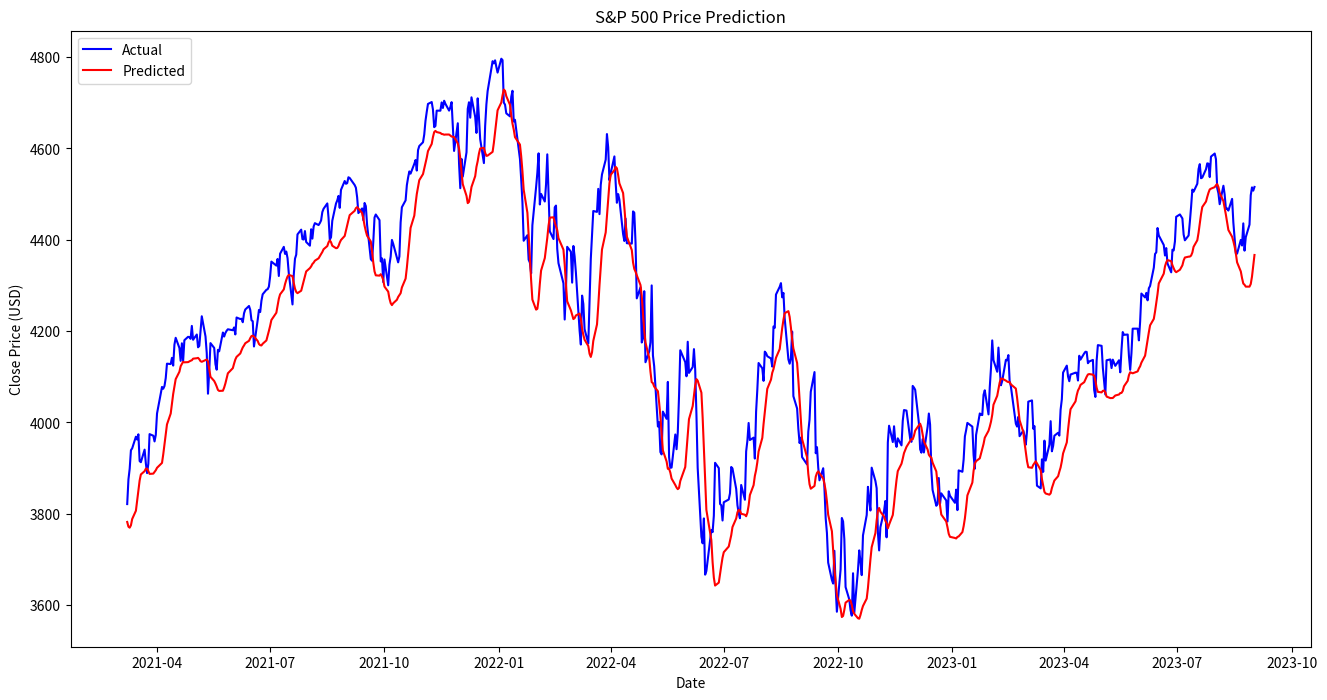

In [ ]:
# Plot the actual and predicted values
plt.figure(figsize=(16, 8))
plt.title('S&P 500 Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.plot(comparison_df['Actual'], label='Actual', color='blue')
plt.plot(comparison_df['Predicted'], label='Predicted', color='red')
plt.legend(loc='upper left')
plt.show()

## Step 8: Future Predictions
Now that we have a trained model, let's use it to make future predictions for the rest of 2023. To do this, we'll:
1. Use the most recent 60 days of data to predict the next day's closing price.
2. Append the predicted value to our data and repeat the process for as many days as we want to forecast.

In [ ]:
# Initialize variables for future prediction
future_days = 120  # Number of days to predict into the future
future_predictions = []
last_60_days_scaled = scaled_data[-60:]  # Most recent 60 days of data
# Loop to predict future prices
for i in range(future_days):
    last_60_days_reshaped = np.reshape(last_60_days_scaled, (1, 60, 1))
    next_day_prediction_scaled = model.predict(last_60_days_reshaped)
    next_day_prediction = scaler.inverse_transform(next_day_prediction_scaled)[0][0]
    future_predictions.append(next_day_prediction)
    last_60_days_scaled = np.append(last_60_days_scaled[1:], next_day_prediction_scaled, axis=0)
# Create a DataFrame to store the future predictions
future_dates = [data.index[-1] + timedelta(days=i+1) for i in range(future_days)]
future_predictions_df = pd.DataFrame(future_predictions, columns=['Predicted'], index=future_dates)
future_predictions_df.head()

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


## Step 9: Visualizing Future Predictions
We've successfully generated future predictions for the S&P 500 for the next 120 days. Now let's visualize these predictions alongside the historical data to get a comprehensive view.

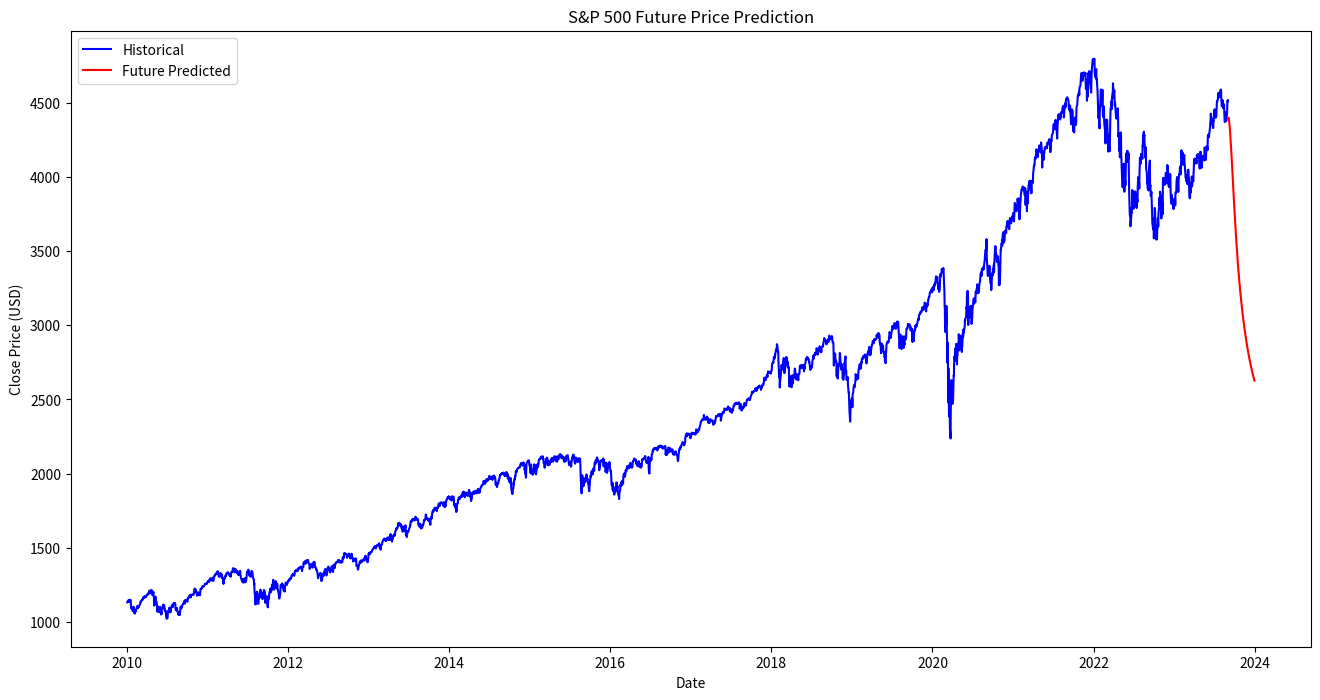

In [ ]:
# Plot the historical and future predicted values
plt.figure(figsize=(16, 8))
plt.title('S&P 500 Future Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.plot(data['Close'], label='Historical', color='blue')
plt.plot(future_predictions_df['Predicted'], label='Future Predicted', color='red')
plt.legend(loc='upper left')
plt.show()